### Load iris data

In [164]:
from sklearn.datasets import load_iris
import pandas as pd

In [166]:
iris_data = load_iris()
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)
df.head()
# iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [168]:
df['target'] = iris_data.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Inspect Data

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [173]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [175]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Scale data

In [178]:
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['target'])
y = df['target']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [180]:
X_scaled[:5], y[:5]

(array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
        [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
        [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
        [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
        [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]]),
 0    0
 1    0
 2    0
 3    0
 4    0
 Name: target, dtype: int64)

In [182]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3)

### Build Model

In [222]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_train_preds = model.predict(X_train)

### Evaluate Training Metrics

In [225]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_train, y_train_preds))

[[35  0  0]
 [ 0 35  1]
 [ 0  1 33]]


In [227]:
print(classification_report(y_train, y_train_preds, target_names=iris_data.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        35
  versicolor       0.97      0.97      0.97        36
   virginica       0.97      0.97      0.97        34

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105



In [229]:
import seaborn as sns
import matplotlib.pyplot as plt

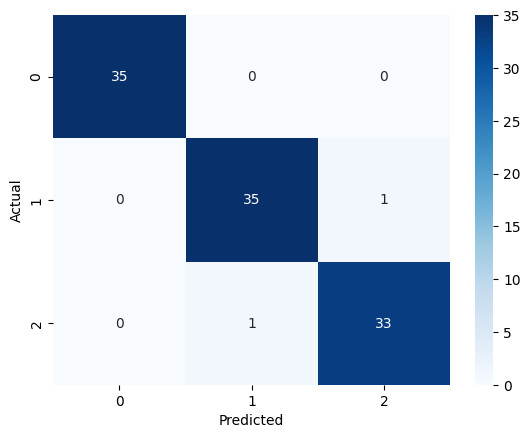

In [231]:
# sns.heatmap(confusion_matrix(y_train, y_train_preds), annot=True, cmap='Blues', 
#             xticklabels=iris_data.target_names, yticklabels=iris_data.target_names)
sns.heatmap(confusion_matrix(y_train, y_train_preds), annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [233]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

print(accuracy_score(y_train, y_train_preds))
print(precision_score(y_train, y_train_preds, average='macro'))
print(f1_score(y_train, y_train_preds, average='macro'))



0.9809523809523809
0.9809368191721134
0.9809368191721134


### Evaluate Testing Metrics

[[15  0  0]
 [ 0 12  2]
 [ 0  0 16]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       1.00      0.86      0.92        14
   virginica       0.89      1.00      0.94        16

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



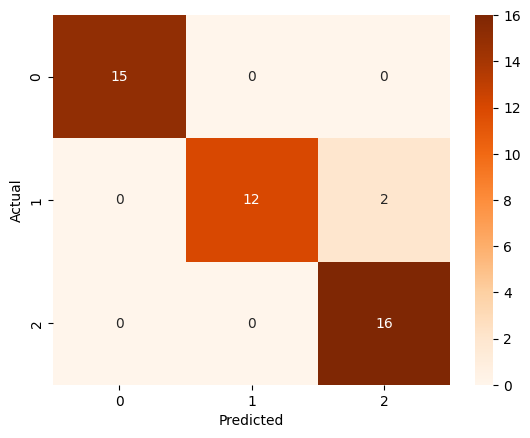

In [236]:
y_test_preds = model.predict(X_test)
print(confusion_matrix(y_test, y_test_preds))
print(classification_report(y_test, y_test_preds, target_names=iris_data.target_names))


sns.heatmap(confusion_matrix(y_test, y_test_preds), annot=True, cmap='Oranges')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [238]:
print(accuracy_score(y_test, y_test_preds))
print(precision_score(y_test, y_test_preds, average='macro'))
print(f1_score(y_test, y_test_preds, average='macro'))

0.9555555555555556
0.9629629629629629
0.9547511312217195
